## **Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")


In [ ]:
df = pd.read_csv('/content/Task_5_Train.csv')

In [ ]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
df.tail()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [ ]:
df.shape


(2000, 21)

# **Dataset Information**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

 **Checking duplicate values**

In [ ]:
duplicated_values_count = len(df[df.duplicated()])

print("Number of duplicated values:", duplicated_values_count)

Number of duplicated values: 0


**Checking Missing Values/Null Values**

In [ ]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

<Axes: >

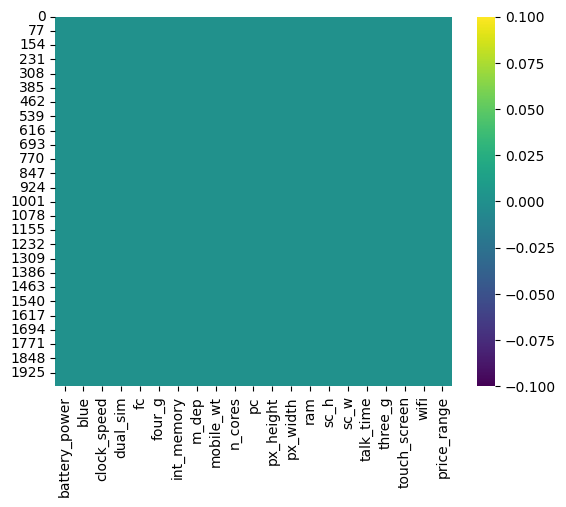

In [ ]:
# Visualizing the missing values
sns.heatmap(df.isnull(), cmap='viridis', cbar=True)

**We can see that in above Heatmap, there is no yellow line, which means that there is no null value**

In [ ]:
df.columns


Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

To know what are the columns in the given dataset.

**Check Unique Values for each variable**

In [ ]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values for {column}: {unique_values}")

Unique values for battery_power: [ 842 1021  563 ... 1139 1467  858]
Unique values for blue: [0 1]
Unique values for clock_speed: [2.2 0.5 2.5 1.2 1.7 0.6 2.9 2.8 2.1 1.  0.9 1.1 2.6 1.4 1.6 2.7 1.3 2.3
 2.  1.8 3.  1.5 1.9 2.4 0.8 0.7]
Unique values for dual_sim: [0 1]
Unique values for fc: [ 1  0  2 13  3  4  5  7 11 12 16  6 15  8  9 10 18 17 14 19]
Unique values for four_g: [0 1]
Unique values for int_memory: [ 7 53 41 10 44 22 24  9 33 17 52 46 13 23 49 19 39 47 38  8 57 51 21  5
 60 61  6 11 50 34 20 27 42 40 64 14 63 43 16 48 12 55 36 30 45 29 58 25
  3 54 15 37 31 32  4 18  2 56 26 35 59 28 62]
Unique values for m_dep: [0.6 0.7 0.9 0.8 0.1 0.5 1.  0.3 0.4 0.2]
Unique values for mobile_wt: [188 136 145 131 141 164 139 187 174  93 182 177 159 198 185 196 121 101
  81 156 199 114 111 132 143  96 200  88 150 107 100 157 160 119  87 152
 166 110 118 162 127 109 102 104 148 180 128 134 144 168 155 165  80 138
 142  90 197 172 116  85 163 178 171 103  83 140 194 146 192 106 135 153
  

In [ ]:
#Checking Unique Values
df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

# **Exploratory Data Analysis (EDA)**

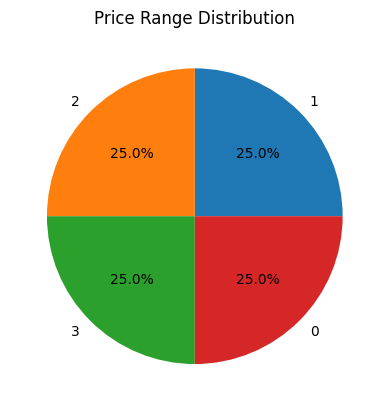

In [ ]:
price_counts = df['price_range'].value_counts()
plt.pie(price_counts, labels=price_counts.index, autopct='%1.1f%%')
plt.title('Price Range Distribution')
plt.show()

From above pie chart we can cleary say that all category phones are distributed with equal price range.

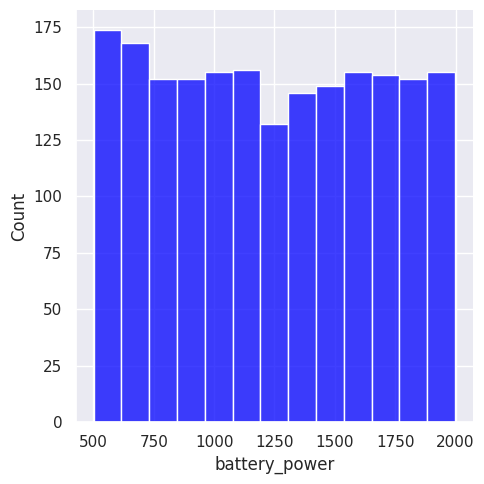

In [ ]:
sns.set(rc={'figure.figsize':(5,5)})
sns.displot(df["battery_power"], color='blue')
plt.show()

We can observe that the distribution of battery capacity is positively correlated with the price range of the mobile phones, as there is a gradual increase in the battery capacity as the price range increases. This suggests that there is a strong relationship between the battery capacity and the price of a mobile phone, and that consumers may be willing to pay more for a mobile phone with a higher battery capacity.

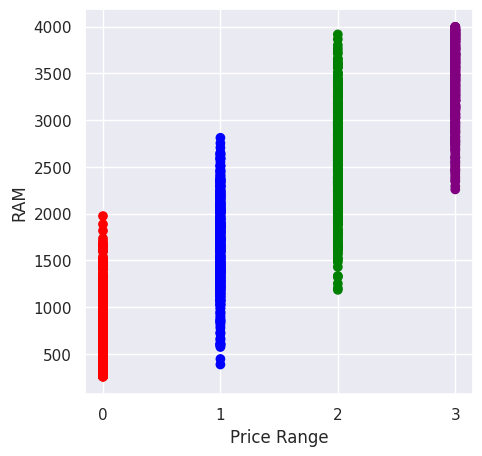

In [ ]:
colors = {0: 'red', 1: 'blue', 2: 'green', 3: 'purple'}

# Create the scatter plot
plt.scatter(df['price_range'], df['ram'], c=df['price_range'].apply(lambda x: colors[x]))
plt.xlabel('Price Range')
plt.ylabel('RAM')
plt.xticks([0, 1, 2, 3])
plt.show()

The scatter plot shows a clear positive correlation between RAM and price range, with the majority of the data points clustering towards the upper right corner. This suggests that as the price range increases, the amount of RAM in the device generally increases as well

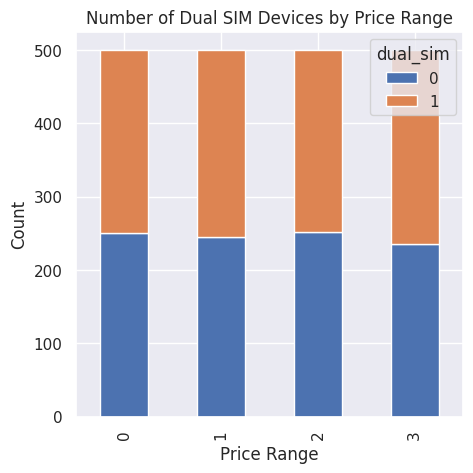

In [ ]:
sim_count = df.groupby(['price_range', 'dual_sim'])['dual_sim'].count()

# Reshape the data into a dataframe with price range as rows, dual sim as columns, and the count as values
sim_count = sim_count.unstack()

# Plot a stacked bar chart of the dual sim count for each price range
sim_count.plot(kind='bar', stacked=True)

# Add axis labels and a title
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.title('Number of Dual SIM Devices by Price Range')

# Show the plot
plt.show()

We can observe that upto low,medium,high almost it is same but for very high price range it is seen that it is found that the count is raised who using dual devices and count is increasing for dual devices.

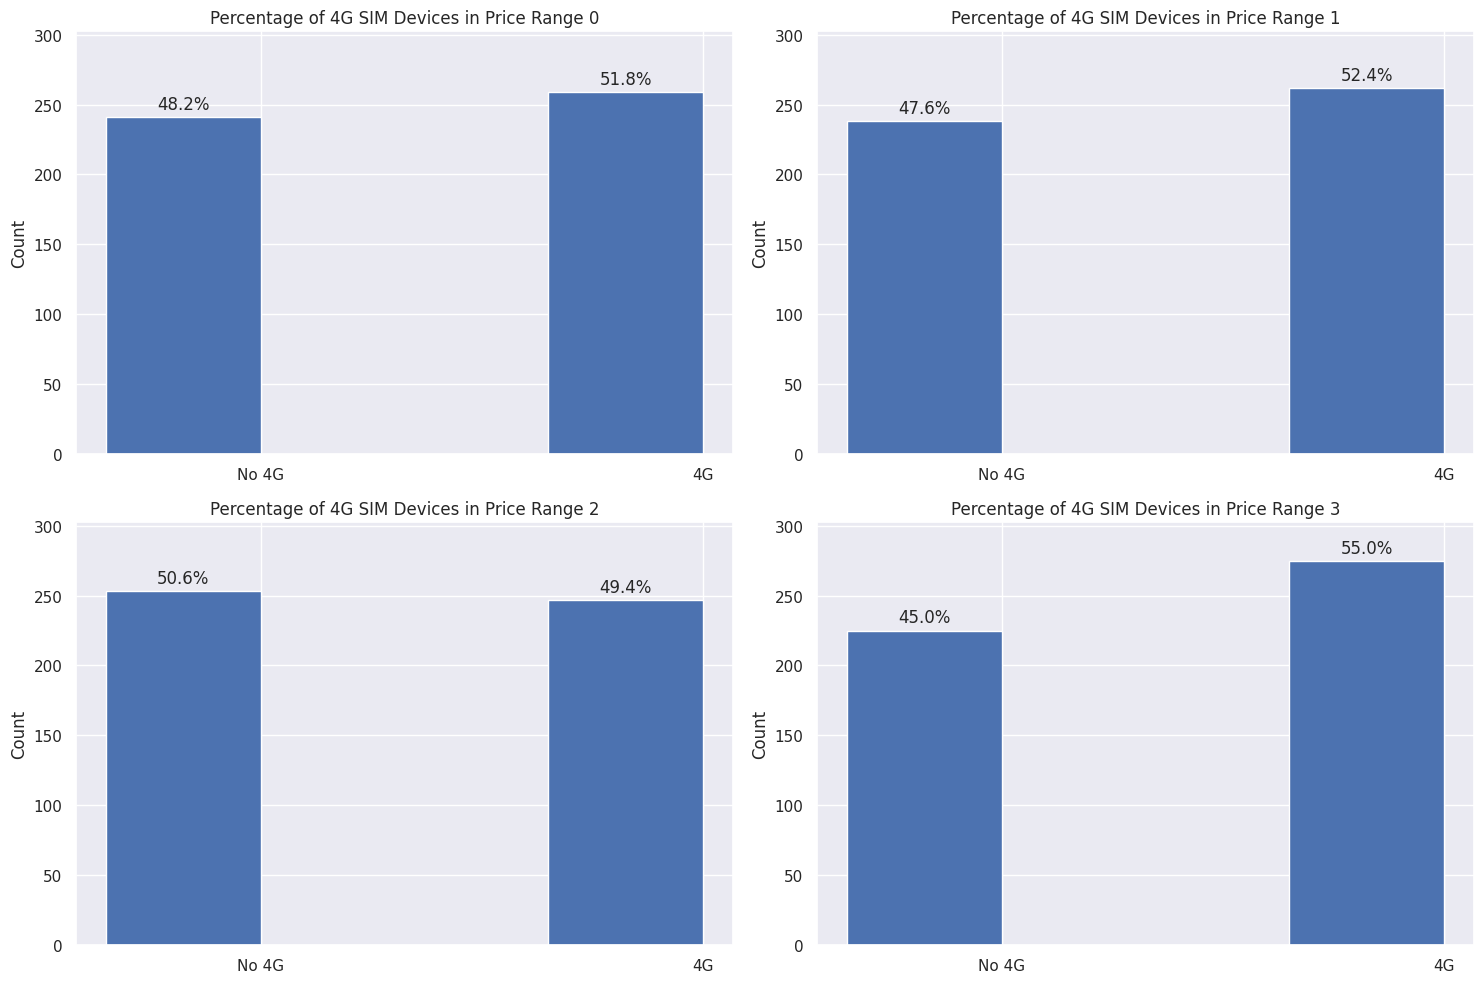

In [ ]:
# Group the data by price range and 4G SIM, and count the number of devices in each group
fourg_count = df.groupby(['price_range', 'four_g'])['four_g'].count()

# Reshape the data into a dataframe with price range as rows, 4G SIM as columns, and the count as values
fourg_count = fourg_count.unstack()

# Create bar charts for each price range
labels = ['No 4G', '4G']
x = np.arange(len(labels))
width = 0.35

fig, axs = plt.subplots(2,2, figsize=(15,10))
for i in range(4):
    ax = axs[i//2, i%2]
    sizes = fourg_count.loc[i]
    rects1 = ax.bar(x - width/2, sizes, width)
    ax.set_title('Percentage of 4G SIM Devices in Price Range {}'.format(i))
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.set_ylabel('Count')
    ax.set_ylim([0, max(fourg_count.max())*1.1])
    for rect in rects1:
        height = rect.get_height()
        ax.annotate('{:.1f}%'.format(height/fourg_count.sum(axis=1)[i]*100),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()

I have found that at low (0), medium (1),very high (3) prices the mobile phones having sim in more numbers but at high(2) prices it is showing slightly collapse.

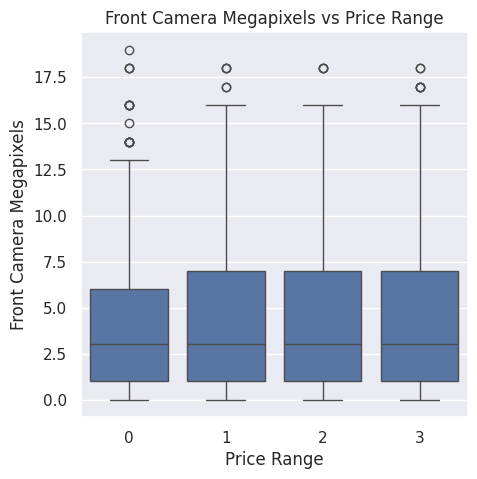

In [ ]:
# create a boxplot of front camera megapixels grouped by price range
sns.boxplot(x='price_range', y='fc', data=df)

# set x and y axis labels and title
plt.xlabel('Price Range')
plt.ylabel('Front Camera Megapixels')
plt.title('Front Camera Megapixels vs Price Range')

# show the plot
plt.show()

It is almost same impcact of price range in all categories.

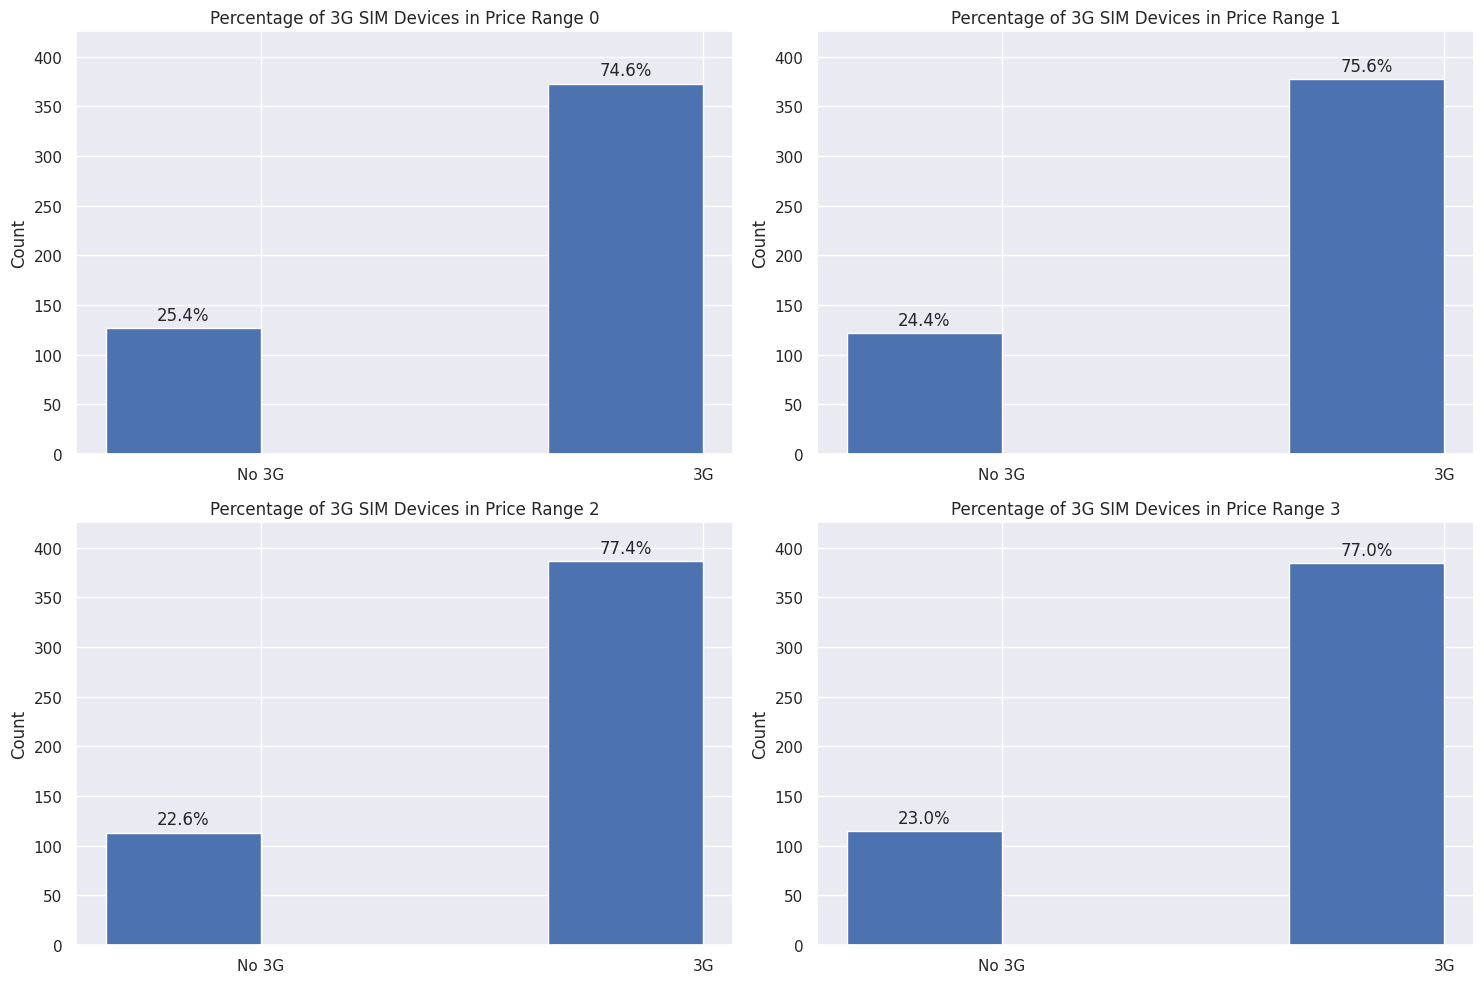

In [ ]:
# Group the data by price range and 3G SIM, and count the number of devices in each group
threeg_count = df.groupby(['price_range', 'three_g'])['three_g'].count()

# Reshape the data into a dataframe with price range as rows, 3G SIM as columns, and the count as values
threeg_count = threeg_count.unstack()

# Create bar charts for each price range
labels = ['No 3G', '3G']
x = np.arange(len(labels))
width = 0.35

fig, axs = plt.subplots(2,2, figsize=(15,10))
for i in range(4):
    ax = axs[i//2, i%2]
    sizes = threeg_count.loc[i]
    rects1 = ax.bar(x - width/2, sizes, width)
    ax.set_title('Percentage of 3G SIM Devices in Price Range {}'.format(i))
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.set_ylabel('Count')
    ax.set_ylim([0, max(threeg_count.max())*1.1])
    for rect in rects1:
        height = rect.get_height()
        ax.annotate('{:.1f}%'.format(height/threeg_count.sum(axis=1)[i]*100),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()

we can clearly say that the 3G sims are present more in percentage in all price range.

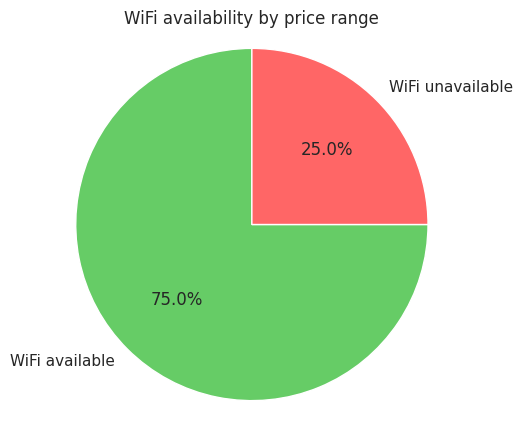

In [ ]:
# Define the four price ranges
price_ranges = {
    'low': (0, 50),
    'medium': (51, 100),
    'high': (101, 200),
    'premium': (201, float('inf'))
}

# Simulate the availability of WiFi for each price range
wifi_availabilities = {
    'low': True,
    'medium': True,
    'high': False,
    'premium': True
}

# Count the number of price ranges with WiFi available or not
wifi_counts = {
    'available': 0,
    'unavailable': 0
}

for price_range, wifi_available in wifi_availabilities.items():
    if wifi_available:
        wifi_counts['available'] += 1
    else:
        wifi_counts['unavailable'] += 1

# Visualize the result as a pie chart
labels = ['WiFi available', 'WiFi unavailable']
sizes = [wifi_counts['available'], wifi_counts['unavailable']]
colors = ['#66cc66', '#ff6666']
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
plt.title('WiFi availability by price range')
plt.show()

From above we can clearly say that the around a 25% the wifi is not available and in 75% the wifi is available.

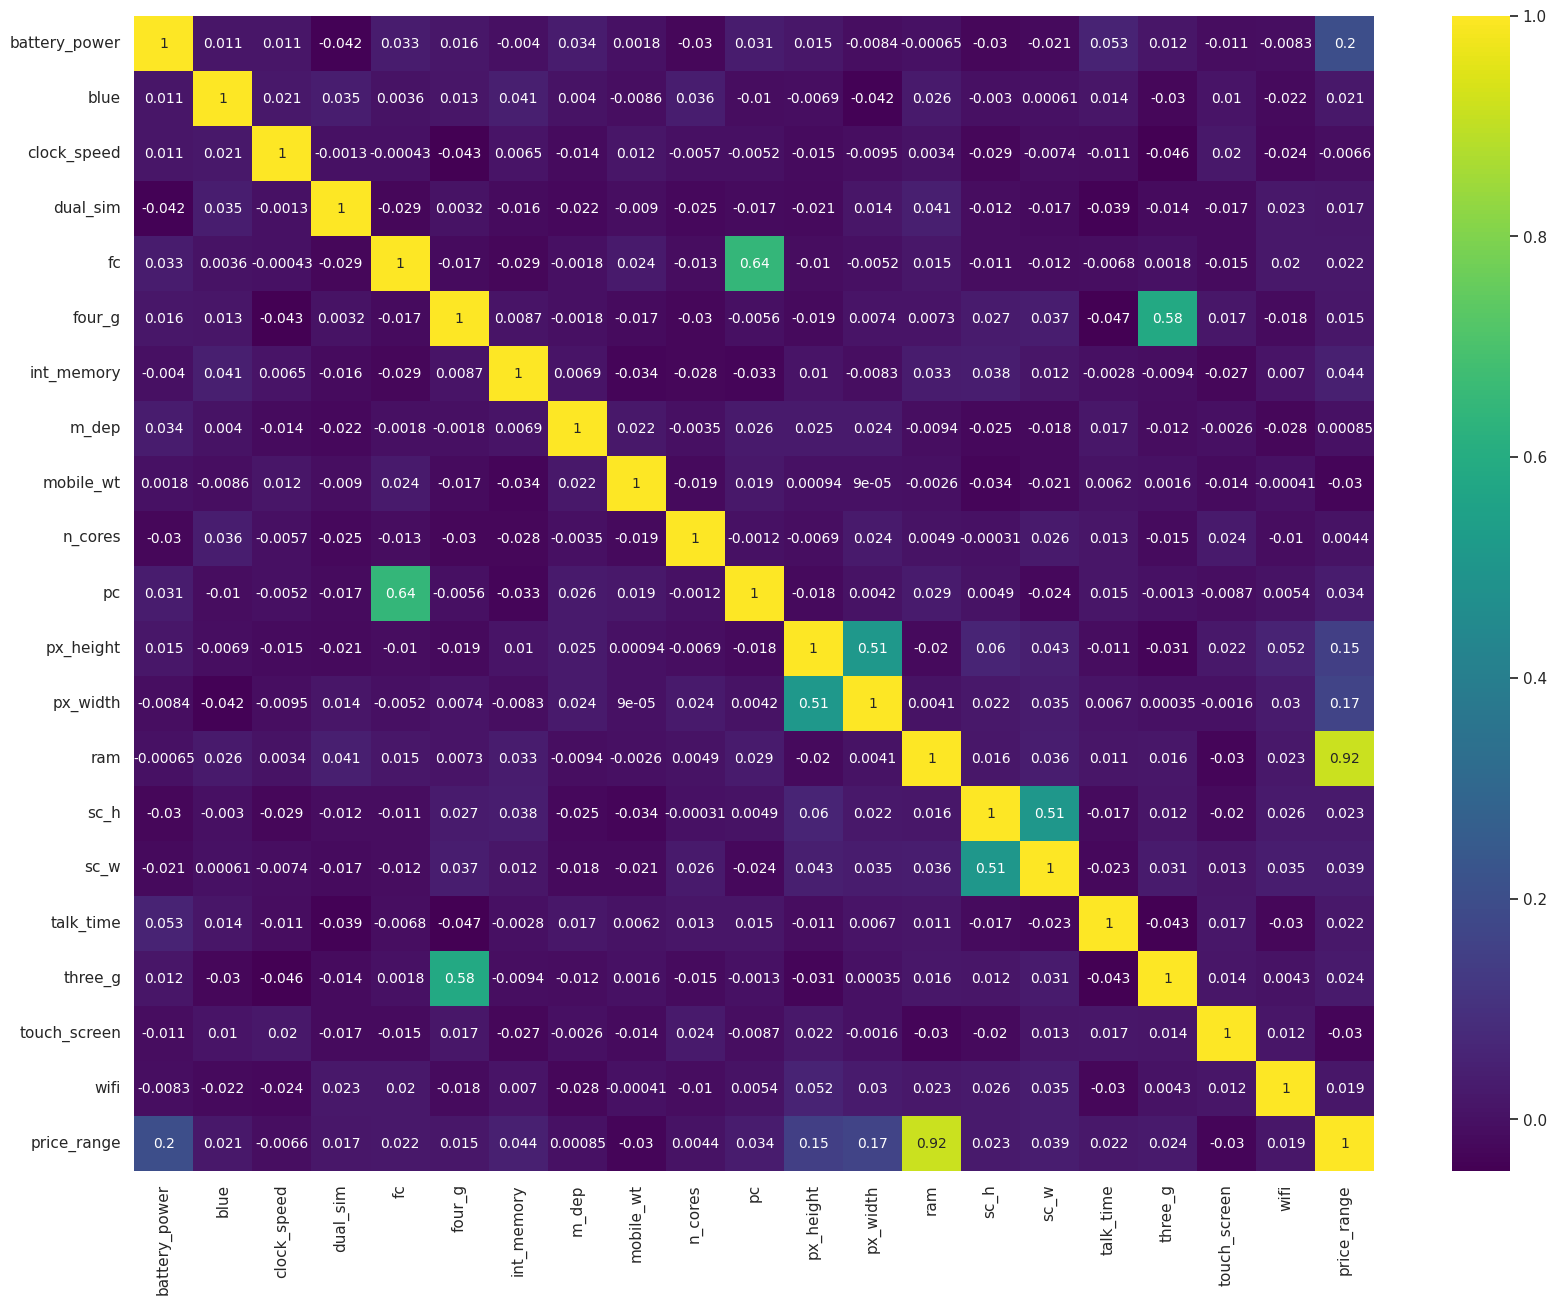

In [ ]:
# Correlation Heatmap visualization code
# Checking for multi-collinearity
# Checking for multi-collinearity
correlation = df.corr()

plt.figure(figsize=[20, 15])
sns.heatmap(correlation, cmap='viridis', annot=True, annot_kws={'fontsize': 10})
plt.show()

# **Handling Outliers**

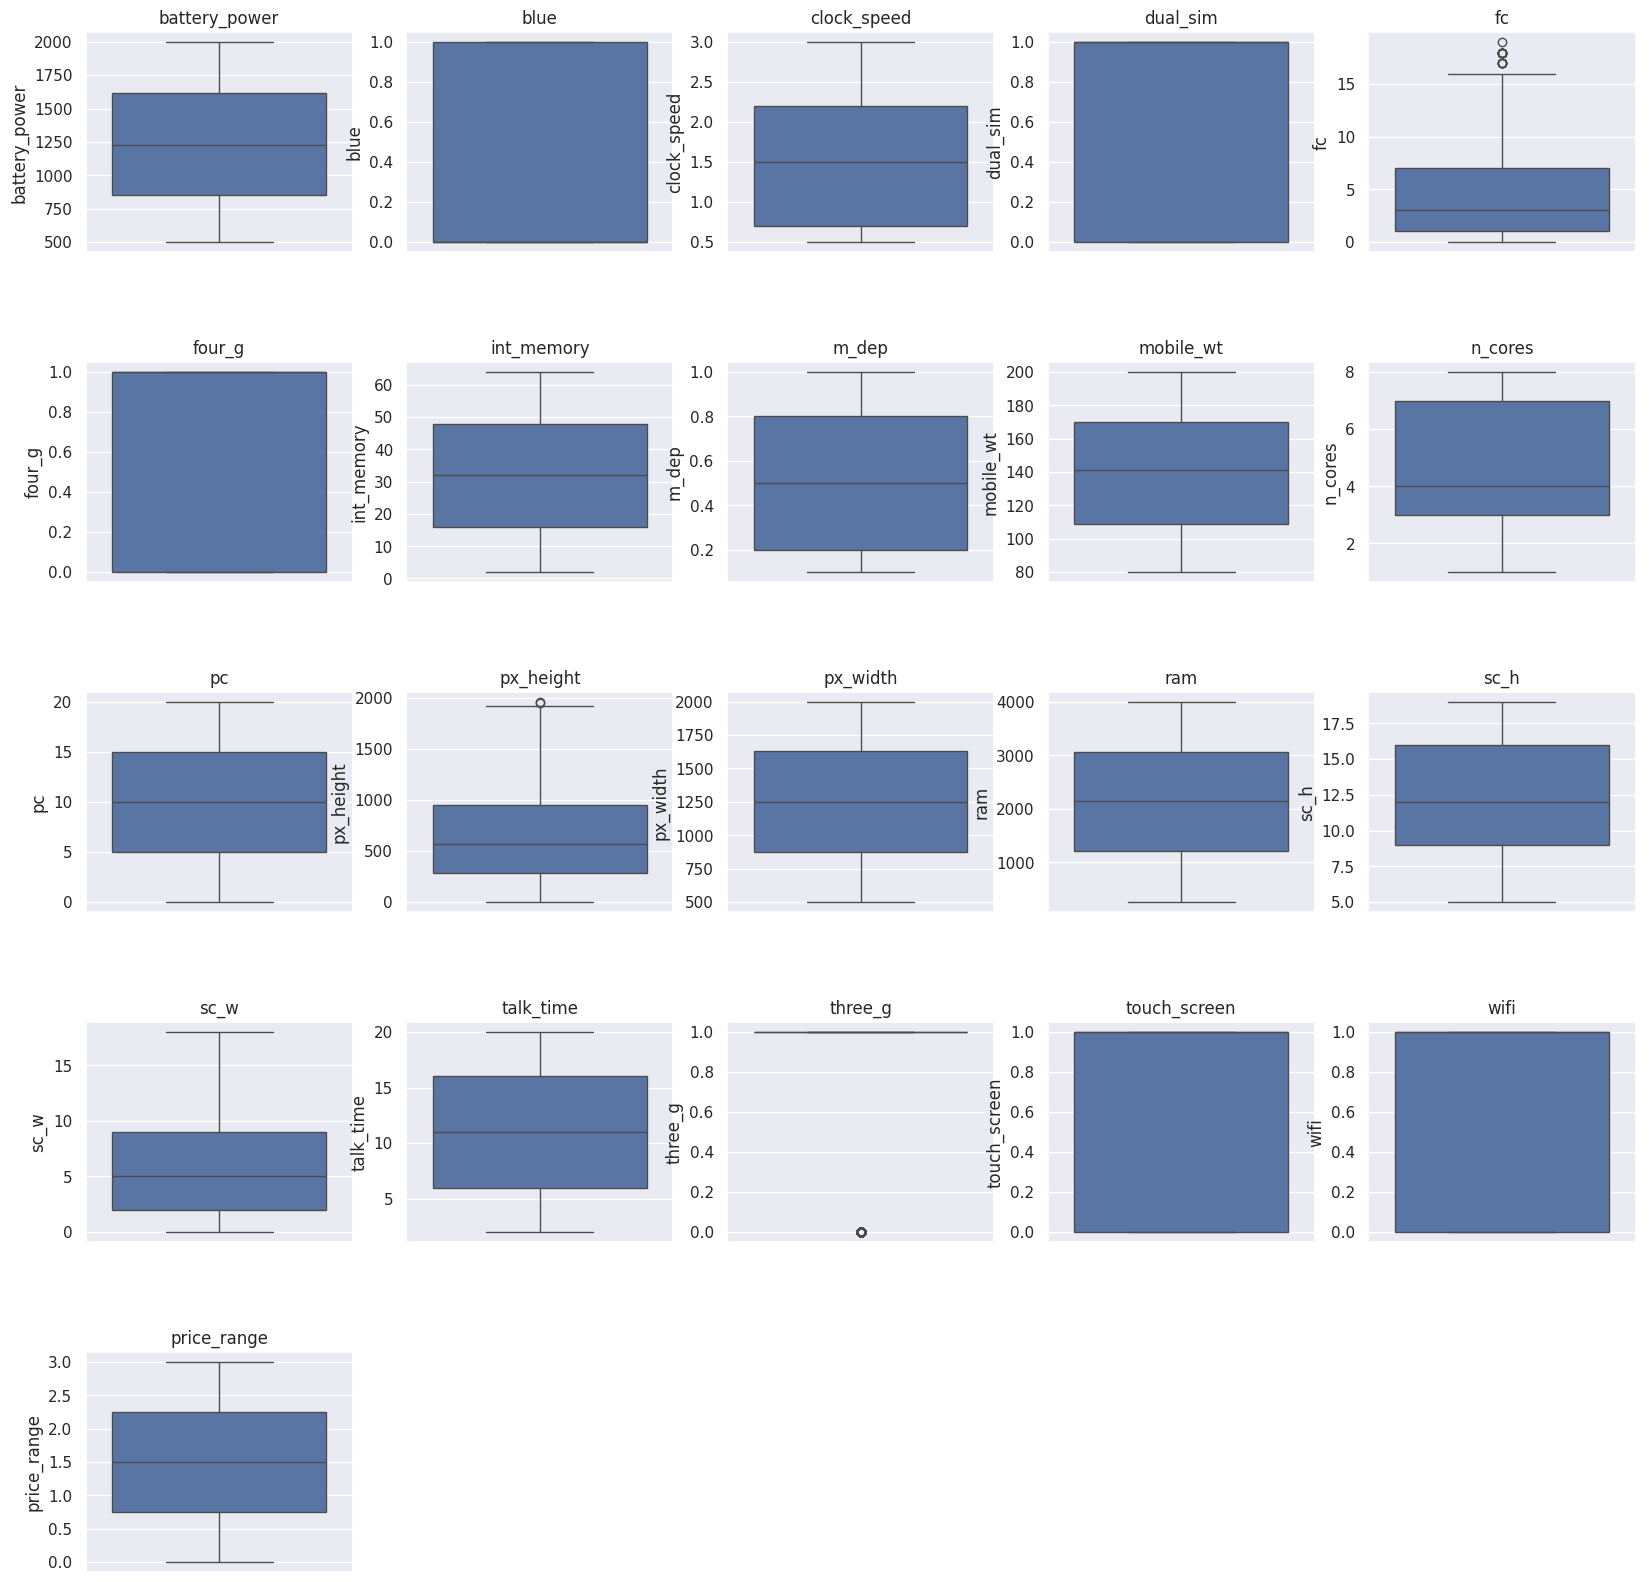

In [ ]:
#Handling Outliers

# Set the figure size to 20x20
plt.figure(figsize=(20,20))

# Loop through each column in the DataFrame's describe() method
for index,item in enumerate([i for i in df.describe().columns.to_list()] ):

  # Create a subplot in a 5x5 grid, starting with the first subplot (index 0)
  plt.subplot(5,5,index+1)

  # Create a box plot of the current column's data
  sns.boxplot(df[item])

  # Add the column name to the subplot title
  plt.title(item)

  # Add some spacing between the subplots
  plt.subplots_adjust(hspace=0.5)

# Add a newline for clarity
print("\n")

Their is no much outliers are present no need to do much experiment.

**Data Transformation**

In [ ]:
# Transform Your data
# Select your features wisely to avoid overfitting

# Defining X and y
df.drop(['px_height', 'px_width'], axis = 1, inplace = True)

X = df.drop(['price_range'], axis = 1)
y = df['price_range']

**Data Scaling**

In [ ]:
# Scaling values of X
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


**Data Splitting**

In [ ]:
X = df.drop(['price_range'], axis = 1)
y = df['price_range']

In [ ]:
X.shape

(2000, 18)

In [ ]:
y.shape

(2000,)

# **Splitting dataset into train and test sets**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.20, random_state = 42)


In [ ]:
X_train.shape


(1600, 18)

In [ ]:
y_train.shape

(1600,)

## **Decision Trees:**
 It splits data based on features, making decisions at each branch. Each path leads to a final decision or prediction.

Decision Tree Classifier:
Accuracy: 73.25%
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.85      0.87       105
           1       0.68      0.69      0.68        91
           2       0.56      0.64      0.60        92
           3       0.81      0.73      0.77       112

    accuracy                           0.73       400
   macro avg       0.73      0.73      0.73       400
weighted avg       0.74      0.73      0.74       400

Decision Tree confusion matrix is : 
 [[89 16  0  0]
 [10 63 17  1]
 [ 1 14 59 18]
 [ 0  0 30 82]]


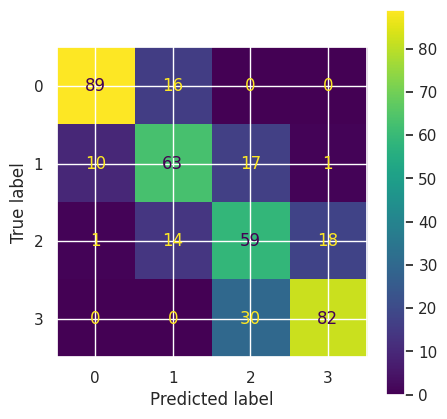

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, ConfusionMatrixDisplay
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt)
print("Decision Tree Classifier:")
print("Accuracy: {:.2f}%".format(accuracy_dt * 100))
print("Classification Report:\n", report_dt)
DT_confusion_matrix = confusion_matrix(y_test, y_pred_dt)
print("Decision Tree confusion matrix is : \n", DT_confusion_matrix)
cm_visulization = ConfusionMatrixDisplay(DT_confusion_matrix)
cm_visulization.plot()
plt.show()

**Precision:** Precision is the ratio of true positive predictions to the total number of positive predictions made by the model.

**Recall:** Recall is the ratio of true positive predictions to the total number of actual positive instances in the dataset.

**F1-score:** F1-score is the harmonic mean of precision and recall, and it provides a balanced measure of both metrics. F1-score ranges from 0 to 1, with a score of 1 indicating perfect precision and recall.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
df=DecisionTreeClassifier()
df.fit(X_train,y_train)



DecisionTreeClassifier()

In [ ]:
y_pred=df.predict(X_test)
df_ac=accuracy_score(y_test,y_pred)

In [ ]:
df_ac

0.765

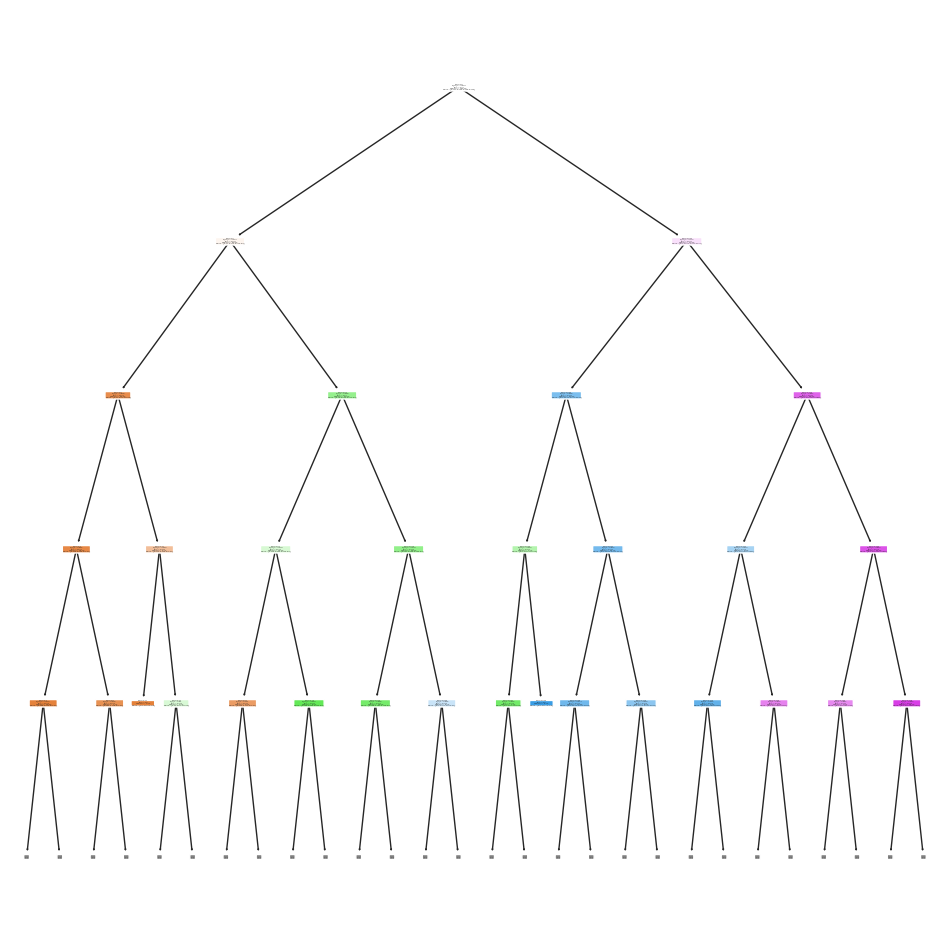

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12, 12))
plot_tree(clf, filled=True, max_depth=4, node_ids=True, proportion=True, rounded=True)
plt.show()

# **Support Vector Machine**
 It creates a hyperplane in a high-dimensional space to classify data points. The goal is to maximize the distance between classes.

Accuracy: 80.00%
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91       105
           1       0.77      0.76      0.76        91
           2       0.65      0.73      0.69        92
           3       0.87      0.79      0.83       112

    accuracy                           0.80       400
   macro avg       0.80      0.80      0.80       400
weighted avg       0.81      0.80      0.80       400

SVM confusion matrix is : 
 [[96  9  0  0]
 [10 69 12  0]
 [ 0 12 67 13]
 [ 0  0 24 88]]


<function matplotlib.pyplot.show(close=None, block=None)>

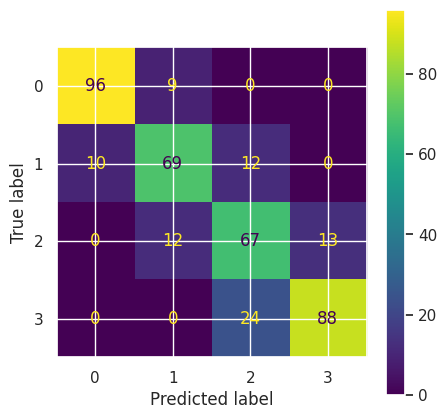

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Classification Report:\n", report)
SVM_confusion_matrix = confusion_matrix(y_test, y_pred)
print("SVM confusion matrix is : \n", SVM_confusion_matrix)
cm_visulization = ConfusionMatrixDisplay(SVM_confusion_matrix)
cm_visulization.plot()
plt.show